In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset into python environment

In [2]:
df = pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [3]:
df.set_index("PassengerId", inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# To get a list of features in a dataset
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S


*Numerical Features  : Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

*Categorical Features: Survived, Sex, Embarked, Pclass, Cabin, Ticket

In [7]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [8]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [9]:
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


1. There are a total of 891 passengers.
2. The Age feature is missing some of its values. Since it is important for the Survival count, we should probably fill this   gap.
3. Also most of the values in Cabin feature is missing. Since there are lot of missing values, we should probably drop this feature.

# 4. Fill in all the missing values present in all the columns in the dataset

In [10]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
df = df.drop(['Cabin'], axis = 1)

In [12]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
df = df.drop(['Ticket'], axis = 1)

In [13]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = df[df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df[df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df[df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


*So it is clear that majority of people boarded in Southampton.

In [14]:
#replacing the missing values in the Embarked feature with S
df = df.fillna({"Embarked": "S"})

In [15]:
# NOw we can fill the Age feature
# get average, std, and number of NaN values in dataset(df)
df_avg   = df["Age"].mean()
df_std   = df["Age"].std()
df_count = df["Age"].isnull().sum()


In [16]:
# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(df_avg - df_std, df_avg + df_std, size = df_count)

In [17]:
#drop all null values, and convert to int
df['Age'].dropna().astype(int)

PassengerId
1      22
2      38
3      26
4      35
5      35
       ..
886    39
887    27
888    19
890    26
891    32
Name: Age, Length: 714, dtype: int32

In [18]:
# fill NaN values in Age column with random values generated
df["Age"][np.isnan(df["Age"])] = rand_1
# convert from float to int
df['Age'] = df['Age'].astype(int)

In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

So we cleared out all the null values in the dataset

# 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of Fare')

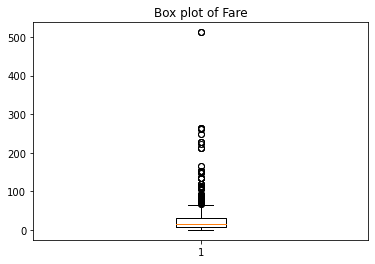

In [20]:
# use a box plot to see if we have outliers
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')

In [21]:
Q1 =np.percentile(df['Fare'], 25, interpolation='midpoint')
Q2 =np.percentile(df['Fare'], 50, interpolation='midpoint')
Q3 =np.percentile(df['Fare'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [22]:
IQR = Q3-Q1

In [23]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.724
65.6344


In [24]:
outlier = []
for x in df['Fare']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [25]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [26]:
ind1 = df['Fare']>up_lim
df.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [27]:
df.drop([ 2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
         793, 803, 821, 830, 836, 847, 850, 857, 864, 880], inplace=True)

In [28]:
ind1 = df['Fare']>up_lim
df.loc[ind1].index    # Lets clear out the remaining values

Int64Index([119, 121, 125, 140, 152, 160, 181, 196, 202, 216, 219, 225, 231,
            246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300, 306,
            307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342,
            367, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 439, 446,
            454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551,
            558, 559, 582, 586, 588, 592, 610, 628, 642, 646, 656, 660, 661,
            666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 746,
            760, 764, 766, 780, 790],
           dtype='int64', name='PassengerId')

In [29]:
df.drop([119, 121, 125, 140, 152, 160, 181, 196, 202, 216, 219, 225, 231,
            246, 257, 258, 259, 263, 269, 270, 276, 291, 292, 298, 300, 306,
            307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342,
            367, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 439, 446,
            454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551,
            558, 559, 582, 586, 588, 592, 610, 628, 642, 646, 656, 660, 661,
            666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 746,
            760, 764, 766, 780, 790], inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

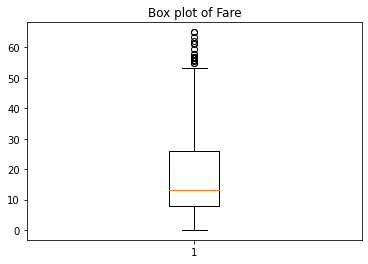

In [30]:
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare')

Text(0.5, 1.0, 'Box plot of Age')

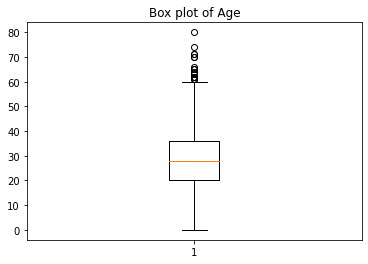

In [31]:
# NOw for AGE
plt.boxplot(df['Age'])
plt.title('Box plot of Age')

In [32]:
Q1 =np.percentile(df['Age'], 25, interpolation='midpoint')
Q2 =np.percentile(df['Age'], 50, interpolation='midpoint')
Q3 =np.percentile(df['Age'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

20.0
28.0
36.0


In [33]:
IQR = Q3-Q1

In [34]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-4.0
60.0


In [35]:
outlier = []
for x in df['Age']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [36]:
outlier

[66, 65, 71, 70, 61, 62, 65, 61, 65, 63, 71, 64, 62, 62, 61, 80, 70, 74]

In [37]:
ind1 = df['Age']>up_lim
df.loc[ind1].index

Int64Index([ 34,  55,  97, 117, 171, 253, 281, 327, 457, 484, 494, 546, 556,
            571, 626, 631, 673, 852],
           dtype='int64', name='PassengerId')

In [38]:
df.drop([ 34,  55,  97, 117, 171, 253, 281, 327, 457, 484, 494, 546, 556,
            571, 626, 631, 673, 852], inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

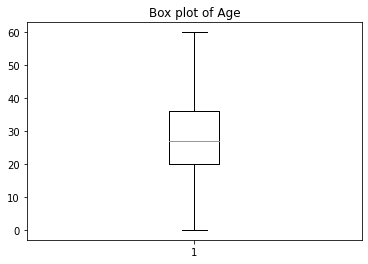

In [39]:
plt.boxplot(df['Age'])
plt.title('Box plot of Age')

Text(0.5, 1.0, 'Box plot of SibSp')

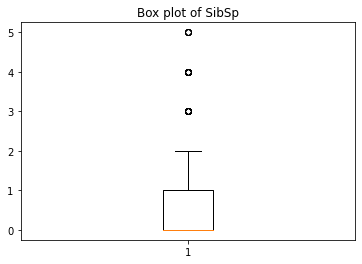

In [40]:
# Next Parch
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')

In [41]:
Q1 =np.percentile(df['SibSp'], 25, interpolation='midpoint')
Q2 =np.percentile(df['SibSp'], 50, interpolation='midpoint')
Q3 =np.percentile(df['SibSp'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [42]:
IQR = Q3-Q1

In [43]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [44]:
outlier = []
for x in df['SibSp']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [45]:
outlier

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [46]:
ind1 = df['SibSp']>up_lim
df.loc[ind1].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [47]:
df.drop([ 8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851], inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

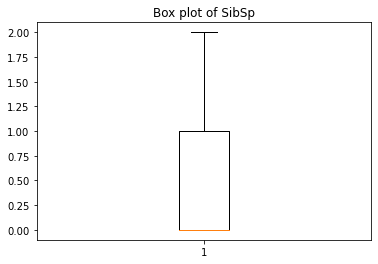

In [48]:
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [49]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [55]:
df = df.drop(['Name'], axis = 1)

In [56]:
df.Embarked.nunique()

3

In [57]:
# Encoding
df = pd.get_dummies(df)

In [59]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22,1,0,7.2500,0,1,0,0,1
3,1,3,26,0,0,7.9250,1,0,0,0,1
4,1,1,35,1,0,53.1000,1,0,0,0,1
5,0,3,35,0,0,8.0500,0,1,0,0,1
6,0,3,25,0,0,8.4583,0,1,0,1,0


In [60]:
y = df['Survived']
x = df.drop('Survived', axis=1)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error
print('MSE is', mean_squared_error(y_test,predictions))
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,predictions))

MSE is 0.16118112920566274
R squared value is : 0.32005753580476337


In [64]:
# MIN MAx
x = df.drop('Survived', axis=1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,2.474341,28.780860,0.281553,0.292649,17.021456,0.314840,0.685160,0.156727,0.095700,0.747573
std,0.730083,11.608269,0.510779,0.761259,13.336601,0.464775,0.464775,0.363795,0.294384,0.434707
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.887500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,11.500000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,36.000000,1.000000,0.000000,24.150000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,60.000000,2.000000,6.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range = (0,1))

In [66]:
x = min_max.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.737171,0.479681,0.140777,0.048775,0.261869,0.314840,0.685160,0.156727,0.095700,0.747573
std,0.365042,0.193471,0.255390,0.126877,0.205178,0.464775,0.464775,0.363795,0.294384,0.434707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.350000,0.000000,0.000000,0.121346,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.466667,0.000000,0.000000,0.176923,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.600000,0.500000,0.000000,0.371538,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
print('MSE is', mean_squared_error(y_test,predictions))
print('R squared value is :', r2_score(y_test,predictions))

MSE is 0.1618085137728987
R squared value is : 0.31741091451139736
